In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,r2_score,plot_roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [10]:
data=pd.read_csv(r'C:\Data Scientist Internship Projects\Project housing\Project-Housing_splitted\train.csv')

In [11]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [13]:
pd.get_option("display.max_columns")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [14]:
pd.get_option("display.max_columns")
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
data.shape

(1168, 81)

In [16]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
pd.crosstab(data['SalePrice'],data['MSZoning'], margins=True)

MSZoning,C (all),FV,RH,RL,RM,All
SalePrice,,,,,,
34900,1,0,0,0,0,1
35311,1,0,0,0,0,1
37900,0,0,0,0,1,1
39300,0,0,0,1,0,1
40000,1,0,0,0,0,1
...,...,...,...,...,...,...
611657,0,0,0,1,0,1
625000,0,0,0,1,0,1
745000,0,0,0,1,0,1


In [18]:
pd.crosstab(data['SalePrice'],data['LandSlope'], margins=True)

LandSlope,Gtl,Mod,Sev,All
SalePrice,,,,
34900,1,0,0,1
35311,1,0,0,1
37900,1,0,0,1
39300,0,1,0,1
40000,1,0,0,1
...,...,...,...,...
611657,1,0,0,1
625000,1,0,0,1
745000,1,0,0,1


In [19]:
pd.crosstab(data['SalePrice'],data['Neighborhood'], margins=True)

Neighborhood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,All
SalePrice,,,,,,,,,,,,,,,,,,,,,
34900,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
35311,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
37900,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
39300,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40000,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611657,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
625000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
745000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
pd.crosstab(data['SalePrice'],data['Street'], margins=True)

Street,Grvl,Pave,All
SalePrice,,,
34900,0,1,1
35311,0,1,1
37900,0,1,1
39300,0,1,1
40000,0,1,1
...,...,...,...
611657,0,1,1
625000,0,1,1
745000,0,1,1


In [21]:
pd.crosstab(data['SalePrice'],data['Alley'], margins=True)

Alley,Grvl,Pave,All
SalePrice,,,
40000,0,1,1
52500,1,0,1
58500,1,0,1
87000,1,0,1
89500,1,0,1
...,...,...,...
214500,0,1,1
239000,0,1,1
256000,1,0,1


In [22]:
pd.crosstab(data['SalePrice'],data['LotShape'], margins=True)

LotShape,IR1,IR2,IR3,Reg,All
SalePrice,,,,,
34900,0,0,0,1,1
35311,0,0,0,1,1
37900,0,0,0,1,1
39300,0,0,0,1,1
40000,0,0,0,1,1
...,...,...,...,...,...
611657,1,0,0,0,1
625000,1,0,0,0,1
745000,1,0,0,0,1


In [23]:
pd.crosstab(data['SalePrice'],data['LandContour'], margins=True)

LandContour,Bnk,HLS,Low,Lvl,All
SalePrice,,,,,
34900,0,0,0,1,1
35311,0,0,0,1,1
37900,0,0,0,1,1
39300,0,0,1,0,1
40000,0,0,0,1,1
...,...,...,...,...,...
611657,0,0,0,1,1
625000,0,0,0,1,1
745000,0,0,0,1,1


In [24]:
pd.crosstab(data['SalePrice'],data['Condition1'], margins=True)

Condition1,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,All
SalePrice,,,,,,,,,,
34900,0,0,1,0,0,0,0,0,0,1
35311,0,0,1,0,0,0,0,0,0,1
37900,0,0,1,0,0,0,0,0,0,1
39300,0,0,1,0,0,0,0,0,0,1
40000,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
611657,0,0,1,0,0,0,0,0,0,1
625000,0,0,1,0,0,0,0,0,0,1
745000,0,0,1,0,0,0,0,0,0,1


In [25]:
pd.crosstab(data['SalePrice'],data['Condition2'], margins=True)

Condition2,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,All
SalePrice,,,,,,,,,
34900,0,0,1,0,0,0,0,0,1
35311,0,0,1,0,0,0,0,0,1
37900,0,0,1,0,0,0,0,0,1
39300,0,0,1,0,0,0,0,0,1
40000,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
611657,0,0,1,0,0,0,0,0,1
625000,0,0,1,0,0,0,0,0,1
745000,0,0,1,0,0,0,0,0,1


In [26]:
pd.crosstab(data['SalePrice'],data['BldgType'], margins=True)

BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,All
SalePrice,,,,,,
34900,1,0,0,0,0,1
35311,1,0,0,0,0,1
37900,1,0,0,0,0,1
39300,1,0,0,0,0,1
40000,1,0,0,0,0,1
...,...,...,...,...,...,...
611657,1,0,0,0,0,1
625000,1,0,0,0,0,1
745000,1,0,0,0,0,1


In [27]:
pd.crosstab(data['SalePrice'],data['HouseStyle'], margins=True)

HouseStyle,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,All
SalePrice,,,,,,,,,
34900,0,0,1,0,0,0,0,0,1
35311,0,0,1,0,0,0,0,0,1
37900,1,0,0,0,0,0,0,0,1
39300,0,0,1,0,0,0,0,0,1
40000,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
611657,0,0,1,0,0,0,0,0,1
625000,0,0,0,0,0,1,0,0,1
745000,0,0,0,0,0,1,0,0,1


In [28]:
pd.crosstab(data['SalePrice'],data['RoofStyle'], margins=True)

RoofStyle,Flat,Gable,Gambrel,Hip,Mansard,Shed,All
SalePrice,,,,,,,
34900,0,1,0,0,0,0,1
35311,0,1,0,0,0,0,1
37900,0,1,0,0,0,0,1
39300,0,1,0,0,0,0,1
40000,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...
611657,0,0,0,1,0,0,1
625000,0,0,0,1,0,0,1
745000,0,0,0,1,0,0,1


In [29]:
pd.crosstab(data['SalePrice'],data['Heating'], margins=True)

Heating,Floor,GasA,GasW,Grav,OthW,Wall,All
SalePrice,,,,,,,
34900,0,1,0,0,0,0,1
35311,0,1,0,0,0,0,1
37900,0,0,0,1,0,0,1
39300,0,1,0,0,0,0,1
40000,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...
611657,0,1,0,0,0,0,1
625000,0,1,0,0,0,0,1
745000,0,1,0,0,0,0,1


In [30]:
pd.crosstab(data['SalePrice'],data['MasVnrType'], margins=True)

MasVnrType,BrkCmn,BrkFace,None,Stone,All
SalePrice,,,,,
34900,0,0,1,0,1
35311,0,0,1,0,1
37900,0,0,1,0,1
39300,0,0,1,0,1
40000,0,0,1,0,1
...,...,...,...,...,...
611657,0,0,0,1,1
625000,0,1,0,0,1
745000,0,0,1,0,1


In [31]:
pd.crosstab(data['SalePrice'],data['MiscFeature'], margins=True)

MiscFeature,Gar2,Othr,Shed,TenC,All
SalePrice,,,,,
55993,0,0,1,0,1
76500,0,0,1,0,1
79500,0,0,1,0,1
81000,0,0,1,0,1
83000,0,0,1,0,1
88000,0,0,1,0,1
90000,0,0,1,0,1
106500,0,0,1,0,1
110000,0,0,1,0,1


In [32]:
pd.crosstab(data['SalePrice'],data['Fence'], margins=True)

Fence,GdPrv,GdWo,MnPrv,MnWw,All
SalePrice,,,,,
34900,0,1,0,0,1
37900,0,1,0,0,1
40000,0,0,1,0,1
55000,0,0,1,0,1
62383,0,1,0,0,1
...,...,...,...,...,...
301000,0,0,1,0,1
345000,0,0,1,0,1
475000,1,0,0,0,1


In [33]:
pd.crosstab(data['SalePrice'],data['GarageCond'], margins=True)

GarageCond,Ex,Fa,Gd,Po,TA,All
SalePrice,,,,,,
35311,0,0,0,0,1,1
40000,0,1,0,0,0,1
55993,0,0,0,0,1,1
58500,0,1,0,0,0,1
60000,0,0,0,0,2,2
...,...,...,...,...,...,...
611657,0,0,0,0,1,1
625000,0,0,0,0,1,1
745000,0,0,0,0,1,1


In [34]:
pd.crosstab(data['SalePrice'],data['GarageQual'], margins=True)

GarageQual,Ex,Fa,Gd,Po,TA,All
SalePrice,,,,,,
35311,0,0,0,0,1,1
40000,0,0,0,0,1,1
55993,0,0,0,0,1,1
58500,0,0,0,0,1,1
60000,0,0,0,0,2,2
...,...,...,...,...,...,...
611657,0,0,0,0,1,1
625000,0,0,0,0,1,1
745000,0,0,0,0,1,1


In [35]:
pd.crosstab(data['SalePrice'],data['PavedDrive'], margins=True)

PavedDrive,N,P,Y,All
SalePrice,,,,
34900,1,0,0,1
35311,0,0,1,1
37900,0,0,1,1
39300,1,0,0,1
40000,1,0,0,1
...,...,...,...,...
611657,0,0,1,1
625000,0,0,1,1
745000,0,0,1,1


In [36]:
pd.crosstab(data['SalePrice'],data['CentralAir'], margins=True)

CentralAir,N,Y,All
SalePrice,,,
34900,1,0,1
35311,1,0,1
37900,1,0,1
39300,1,0,1
40000,1,0,1
...,...,...,...
611657,0,1,1
625000,0,1,1
745000,0,1,1


In [37]:
pd.crosstab(data['SalePrice'],data['PoolQC'], margins=True)

PoolQC,Ex,Fa,Gd,All
SalePrice,,,,
160000,0,0,1,1
171000,0,0,1,1
181000,0,1,0,1
235000,1,0,0,1
250000,0,1,0,1
274970,0,0,1,1
745000,1,0,0,1
All,2,2,3,7


In [38]:
pd.crosstab(data['SalePrice'],data['GarageFinish'], margins=True)

GarageFinish,Fin,RFn,Unf,All
SalePrice,,,,
35311,0,0,1,1
40000,0,0,1,1
55993,0,0,1,1
58500,0,0,1,1
60000,0,0,2,2
...,...,...,...,...
611657,1,0,0,1
625000,1,0,0,1
745000,1,0,0,1


In [39]:
pd.crosstab(data['SalePrice'],data['ExterQual'], margins=True)

ExterQual,Ex,Fa,Gd,TA,All
SalePrice,,,,,
34900,0,0,0,1,1
35311,0,0,0,1,1
37900,0,0,0,1,1
39300,0,1,0,0,1
40000,0,0,0,1,1
...,...,...,...,...,...
611657,1,0,0,0,1
625000,0,0,1,0,1
745000,0,0,1,0,1


In [40]:
pd.crosstab(data['SalePrice'],data['FireplaceQu'], margins=True)

FireplaceQu,Ex,Fa,Gd,Po,TA,All
SalePrice,,,,,,
60000,0,0,0,1,0,1
62383,0,0,0,1,0,1
90350,0,0,1,0,0,1
91500,0,0,0,0,1,1
93000,0,0,1,0,0,1
...,...,...,...,...,...,...
611657,0,0,1,0,0,1
625000,0,0,0,0,1,1
745000,0,0,0,0,1,1


In [41]:
pd.crosstab(data['SalePrice'],data['KitchenQual'], margins=True)

KitchenQual,Ex,Fa,Gd,TA,All
SalePrice,,,,,
34900,0,0,0,1,1
35311,0,0,0,1,1
37900,0,0,0,1,1
39300,0,1,0,0,1
40000,0,0,0,1,1
...,...,...,...,...,...
611657,1,0,0,0,1
625000,0,0,1,0,1
745000,1,0,0,0,1


In [42]:
pd.crosstab(data['SalePrice'],data['BsmtFinType2'], margins=True)

BsmtFinType2,ALQ,BLQ,GLQ,LwQ,Rec,Unf,All
SalePrice,,,,,,,
34900,0,0,0,0,0,1,1
35311,0,0,0,0,0,1,1
37900,0,0,0,0,0,1,1
40000,0,0,0,0,0,1,1
52000,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...
611657,0,0,0,0,0,1,1
625000,0,0,0,0,0,1,1
745000,0,0,0,0,0,1,1


In [43]:
pd.crosstab(data['SalePrice'],data['BsmtExposure'], margins=True)

BsmtExposure,Av,Gd,Mn,No,All
SalePrice,,,,,
34900,0,0,0,1,1
35311,1,0,0,0,1
37900,0,0,0,1,1
40000,0,0,0,1,1
52000,0,0,0,1,1
...,...,...,...,...,...
611657,0,1,0,0,1
625000,0,1,0,0,1
745000,1,0,0,0,1


In [44]:
pd.crosstab(data['SalePrice'],data['Exterior1st'], margins=True)

Exterior1st,AsbShng,AsphShn,BrkComm,BrkFace,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,All
SalePrice,,,,,,,,,,,,,,,
34900,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
35311,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
37900,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
39300,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
40000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611657,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
625000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
745000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [45]:
pd.crosstab(data['SalePrice'],data['Exterior2nd'], margins=True)

Exterior2nd,AsbShng,AsphShn,Brk Cmn,BrkFace,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,All
SalePrice,,,,,,,,,,,,,,,,
34900,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
35311,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
37900,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
39300,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
40000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611657,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
625000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
745000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [46]:
pd.crosstab(data['SalePrice'],data['ExterCond'], margins=True)

ExterCond,Ex,Fa,Gd,Po,TA,All
SalePrice,,,,,,
34900,0,0,0,0,1,1
35311,0,0,0,0,1,1
37900,0,0,0,0,1,1
39300,0,1,0,0,0,1
40000,0,1,0,0,0,1
...,...,...,...,...,...,...
611657,0,0,0,0,1,1
625000,0,0,1,0,0,1
745000,0,0,0,0,1,1


In [47]:
pd.crosstab(data['SalePrice'],data['BsmtCond'], margins=True)

BsmtCond,Fa,Gd,Po,TA,All
SalePrice,,,,,
34900,0,0,0,1,1
35311,0,0,0,1,1
37900,0,0,0,1,1
40000,0,0,0,1,1
52000,0,0,0,1,1
...,...,...,...,...,...
611657,0,0,0,1,1
625000,0,0,0,1,1
745000,0,0,0,1,1


In [48]:
pd.crosstab(data['SalePrice'],data['BsmtQual'], margins=True)

BsmtQual,Ex,Fa,Gd,TA,All
SalePrice,,,,,
34900,0,0,0,1,1
35311,0,0,0,1,1
37900,0,0,0,1,1
40000,0,0,0,1,1
52000,0,0,0,1,1
...,...,...,...,...,...
611657,1,0,0,0,1
625000,1,0,0,0,1
745000,1,0,0,0,1


In [49]:
pd.crosstab(data['SalePrice'],data['Foundation'], margins=True)

Foundation,BrkTil,CBlock,PConc,Slab,Stone,Wood,All
SalePrice,,,,,,,
34900,0,1,0,0,0,0,1
35311,0,1,0,0,0,0,1
37900,1,0,0,0,0,0,1
39300,0,0,0,1,0,0,1
40000,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
611657,0,0,1,0,0,0,1
625000,0,0,1,0,0,0,1
745000,0,0,1,0,0,0,1


In [50]:
data.isna().sum()[data.isna().sum()>0]

LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

In [83]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [84]:
cols=['LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [85]:
for col in cols:
    data[col]=data[col].replace(0,np.nan)

In [86]:
data['LotFrontage']=data['LotFrontage'].fillna((data['LotFrontage']).mean())
data['MiscFeature'] = data['MiscFeature'].fillna(data['MiscFeature'].mode()[0])
data['GarageType'] = data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageFinish'] = data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual'] = data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond'] = data['GarageCond'].fillna(data['GarageCond'].mode()[0])
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['PoolQC'] = data['PoolQC'].fillna(data['PoolQC'].mode()[0])
data['Fence'] = data['Fence'].fillna(data['Fence'].mode()[0])
data['BsmtQual'] = data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond'] = data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['FireplaceQu'] = data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mode()[0])
data['Alley'] = data['Alley'].fillna(data['Alley'].mode()[0])
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mode()[0])

In [87]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['Alley']=labelencoder.fit_transform(data['Alley'])
data['LandContour']=labelencoder.fit_transform(data['LandContour'])
data['Utilities']=labelencoder.fit_transform(data['Utilities'])
data['SaleCondition']=labelencoder.fit_transform(data['SaleCondition'])
data['MiscFeature']=labelencoder.fit_transform(data['MiscFeature'])
data['Fence']=labelencoder.fit_transform(data['Fence'])
data['PoolQC']=labelencoder.fit_transform(data['PoolQC'])
data['PavedDrive']=labelencoder.fit_transform(data['PavedDrive'])
data['GarageCond']=labelencoder.fit_transform(data['GarageCond'])
data['GarageQual']=labelencoder.fit_transform(data['GarageQual'])
data['GarageFinish']=labelencoder.fit_transform(data['GarageFinish'])
data['HouseStyle']=labelencoder.fit_transform(data['HouseStyle'])
data['BldgType']=labelencoder.fit_transform(data['BldgType'])
data['LotConfig']=labelencoder.fit_transform(data['LotConfig'])
data['Utilities']=labelencoder.fit_transform(data['Utilities'])
data['LotShape']=labelencoder.fit_transform(data['LotShape'])
data['SaleCondition']=labelencoder.fit_transform(data['SaleCondition'])
data['ExterCond']=labelencoder.fit_transform(data['ExterCond'])
data['Exterior2nd']=labelencoder.fit_transform(data['Exterior2nd'])
data['Exterior1st']=labelencoder.fit_transform(data['Exterior1st'])
data['RoofMatl']=labelencoder.fit_transform(data['RoofMatl'])
data['RoofStyle']=labelencoder.fit_transform(data['RoofStyle'])
data['FireplaceQu']=labelencoder.fit_transform(data['FireplaceQu'])
data['LandSlope']=labelencoder.fit_transform(data['LandSlope'])
data['Neighborhood']=labelencoder.fit_transform(data['Neighborhood'])
data['Condition1']=labelencoder.fit_transform(data['Condition1'])
data['Condition2']=labelencoder.fit_transform(data['Condition2'])
data['MasVnrType']=labelencoder.fit_transform(data['MasVnrType'])
data['ExterQual']=labelencoder.fit_transform(data['ExterQual'])
data['Foundation']=labelencoder.fit_transform(data['Foundation'])
data['BsmtQual']=labelencoder.fit_transform(data['BsmtQual'])
data['Foundation']=labelencoder.fit_transform(data['Foundation'])
data['BsmtCond']=labelencoder.fit_transform(data['BsmtCond'])
data['BsmtExposure']=labelencoder.fit_transform(data['BsmtExposure'])
data['BsmtFinType1']=labelencoder.fit_transform(data['BsmtFinType1'])
data['BsmtFinType2']=labelencoder.fit_transform(data['BsmtFinType2'])
data['BsmtFinType2']=labelencoder.fit_transform(data['BsmtFinType2'])
data['Heating']=labelencoder.fit_transform(data['Heating'])
data['HeatingQC']=labelencoder.fit_transform(data['HeatingQC'])
data['CentralAir']=labelencoder.fit_transform(data['CentralAir'])
data['Electrical']=labelencoder.fit_transform(data['Electrical'])
data['KitchenQual']=labelencoder.fit_transform(data['KitchenQual'])
data['Functional']=labelencoder.fit_transform(data['Functional'])
data['GarageType']=labelencoder.fit_transform(data['GarageType'])
data['SaleType']=labelencoder.fit_transform(data['SaleType'])

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   float64
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   float64
 6   Alley          1168 non-null   int64  
 7   LotShape       1168 non-null   int64  
 8   LandContour    1168 non-null   int64  
 9   Utilities      1168 non-null   int64  
 10  LotConfig      1168 non-null   int64  
 11  LandSlope      1168 non-null   int64  
 12  Neighborhood   1168 non-null   int64  
 13  Condition1     1168 non-null   int64  
 14  Condition2     1168 non-null   int64  
 15  BldgType       1168 non-null   int64  
 16  HouseStyle     1168 non-null   int64  
 17  OverallQual    1168 non-null   int64  
 18  OverallC

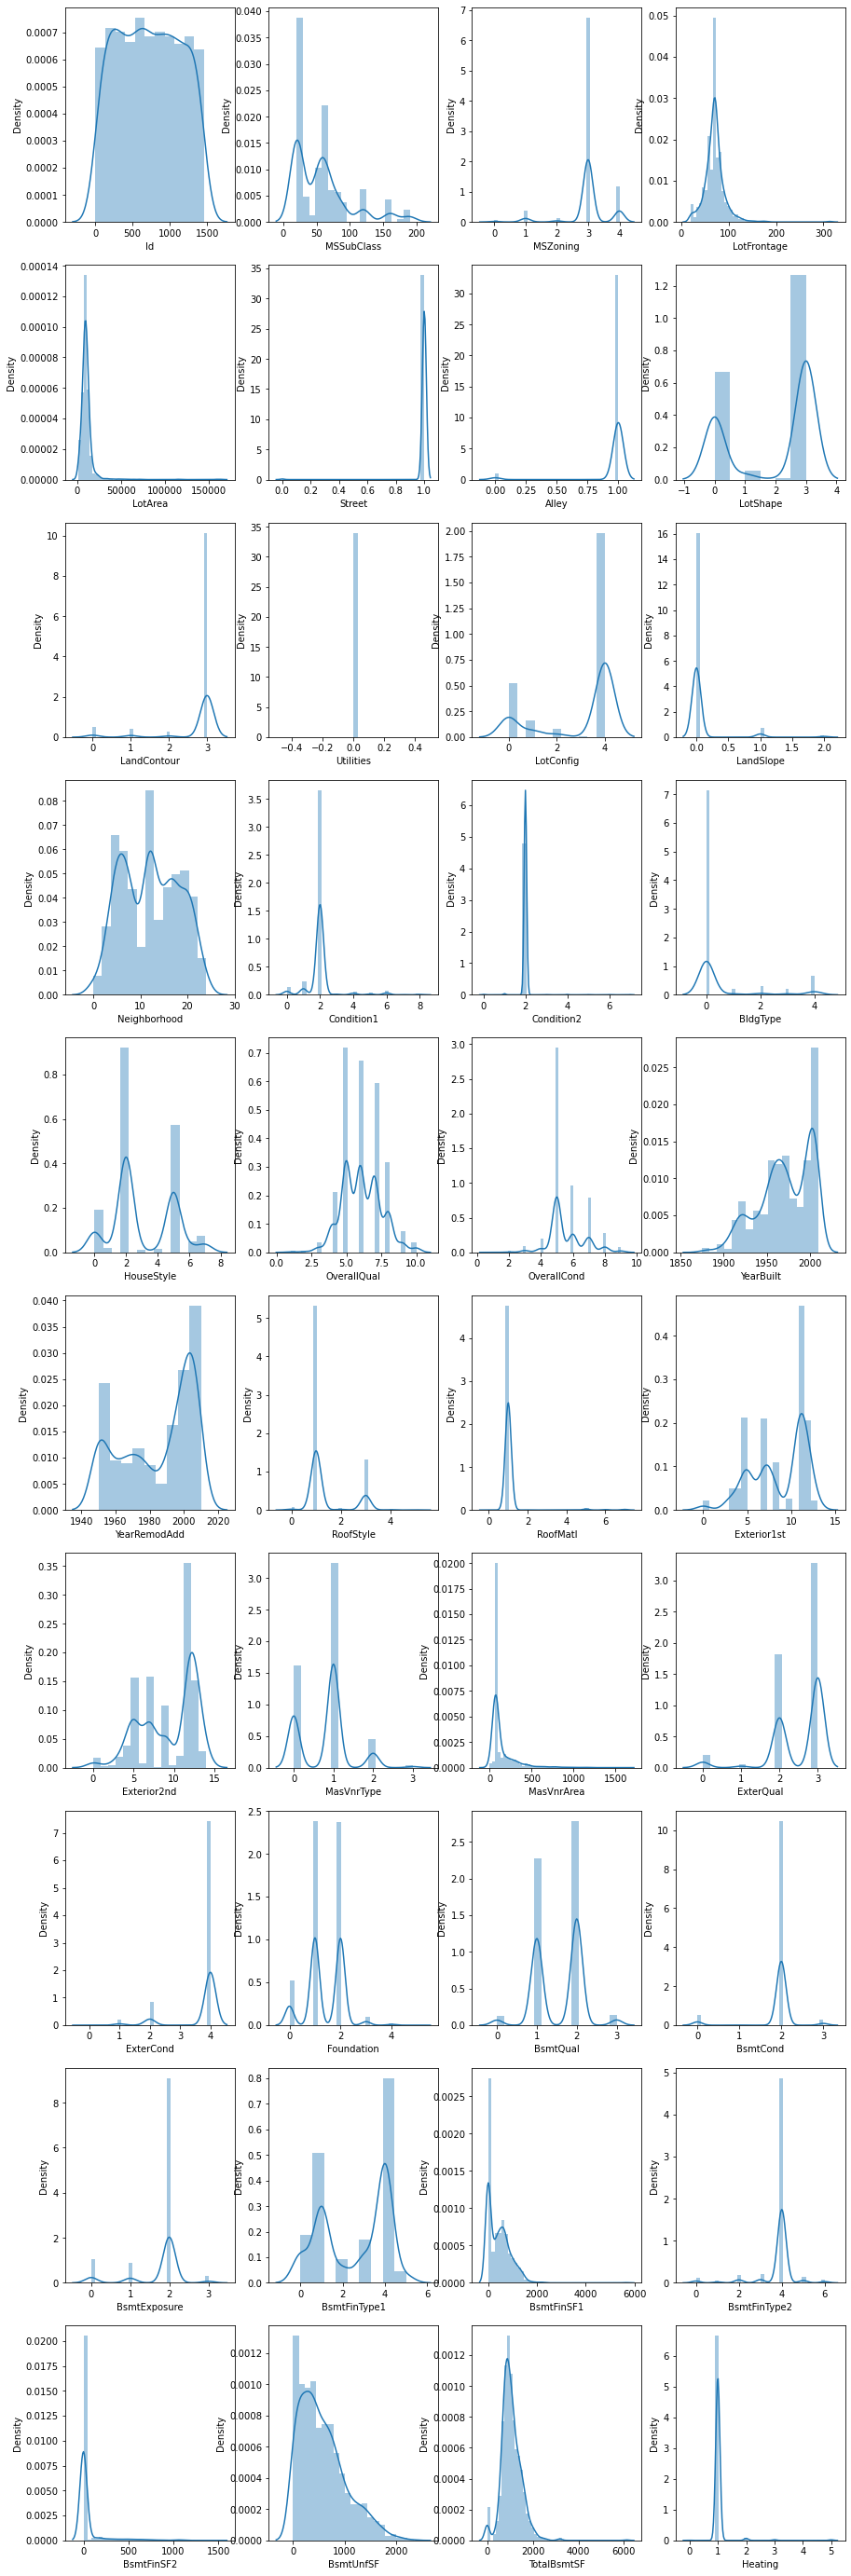

In [91]:
plt.figure(figsize=(15,50))
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

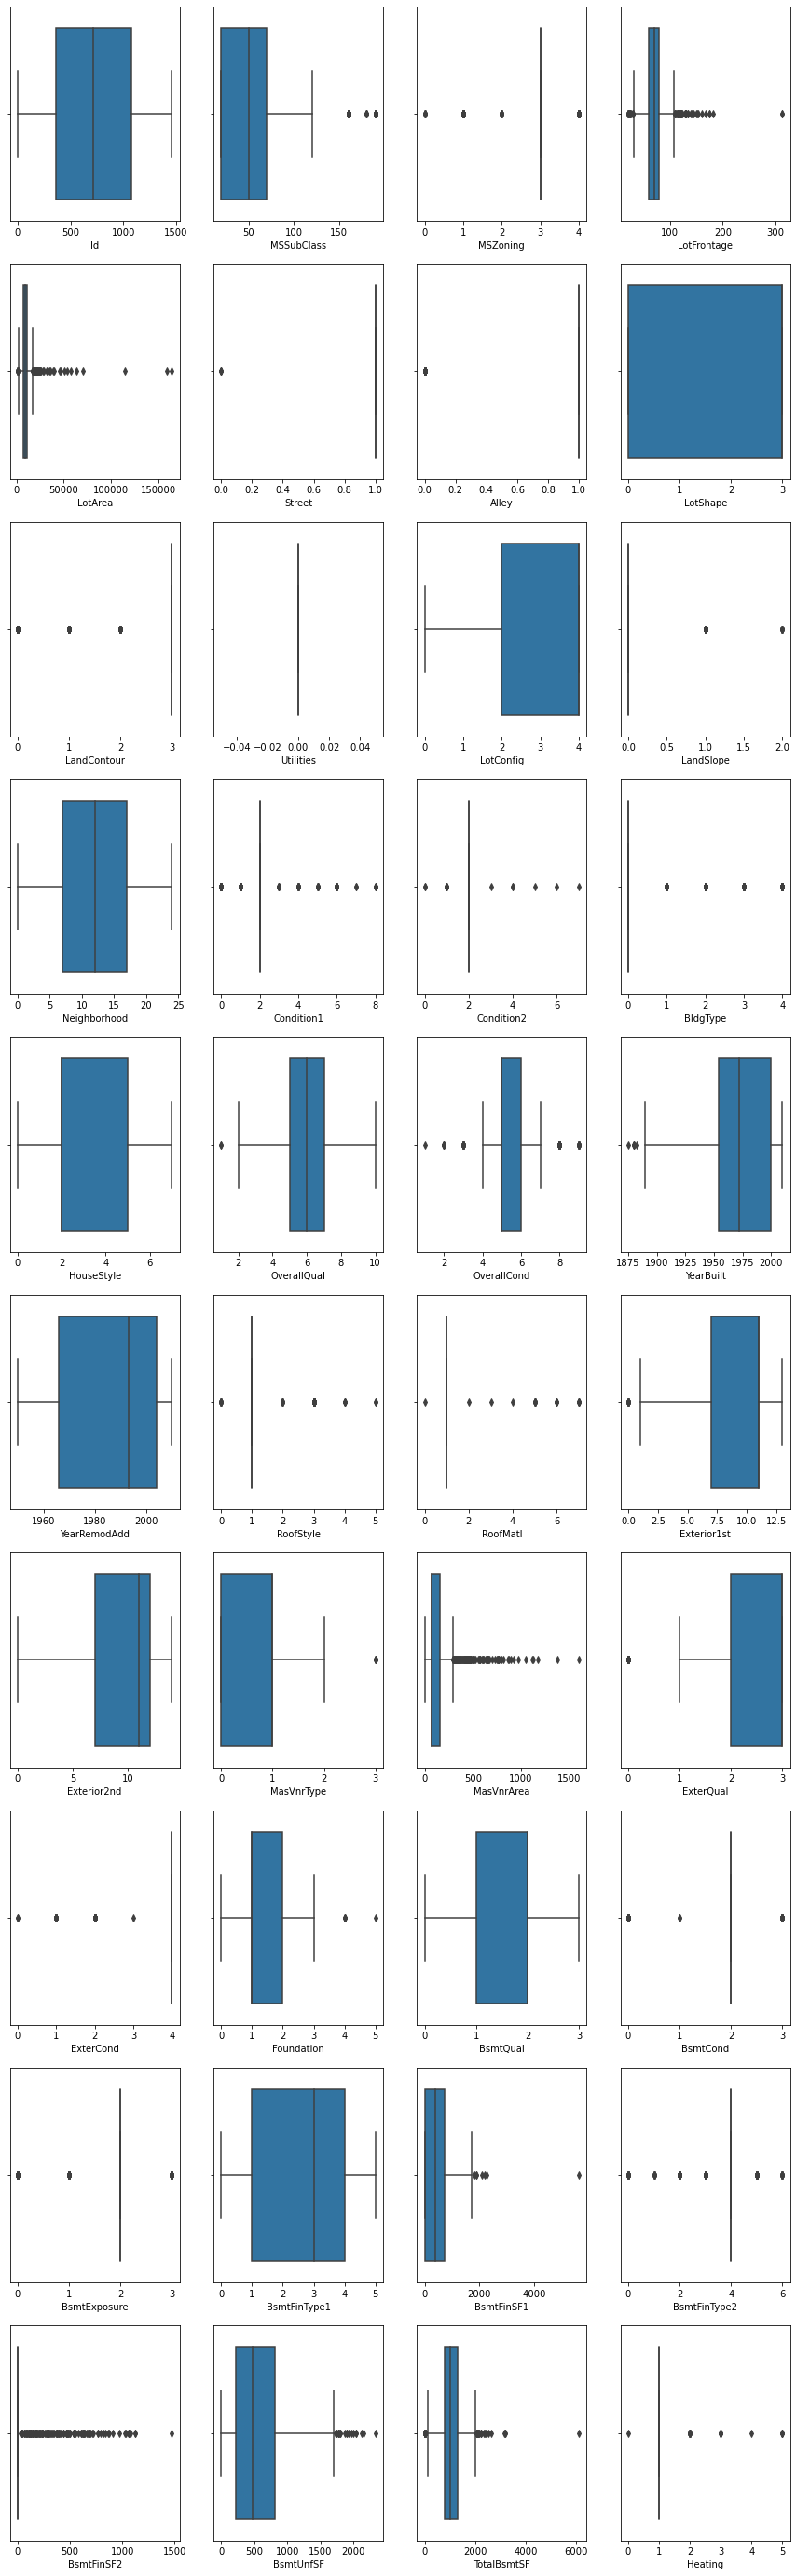

In [100]:
plt.figure(figsize=(15,50))
graph=1
for column in data:
    if graph<=40:
        ax=plt.subplot(10,4,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [117]:
## By using Zscore to remove outliers
from scipy.stats import zscore
z_score= zscore(data[['BsmtFinSF2','ExterCond','LotArea','Heating','MSSubClass','LotFrontage','TotalBsmtSF']])
abs_z_score= np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
datanew=data[filtering_entry]

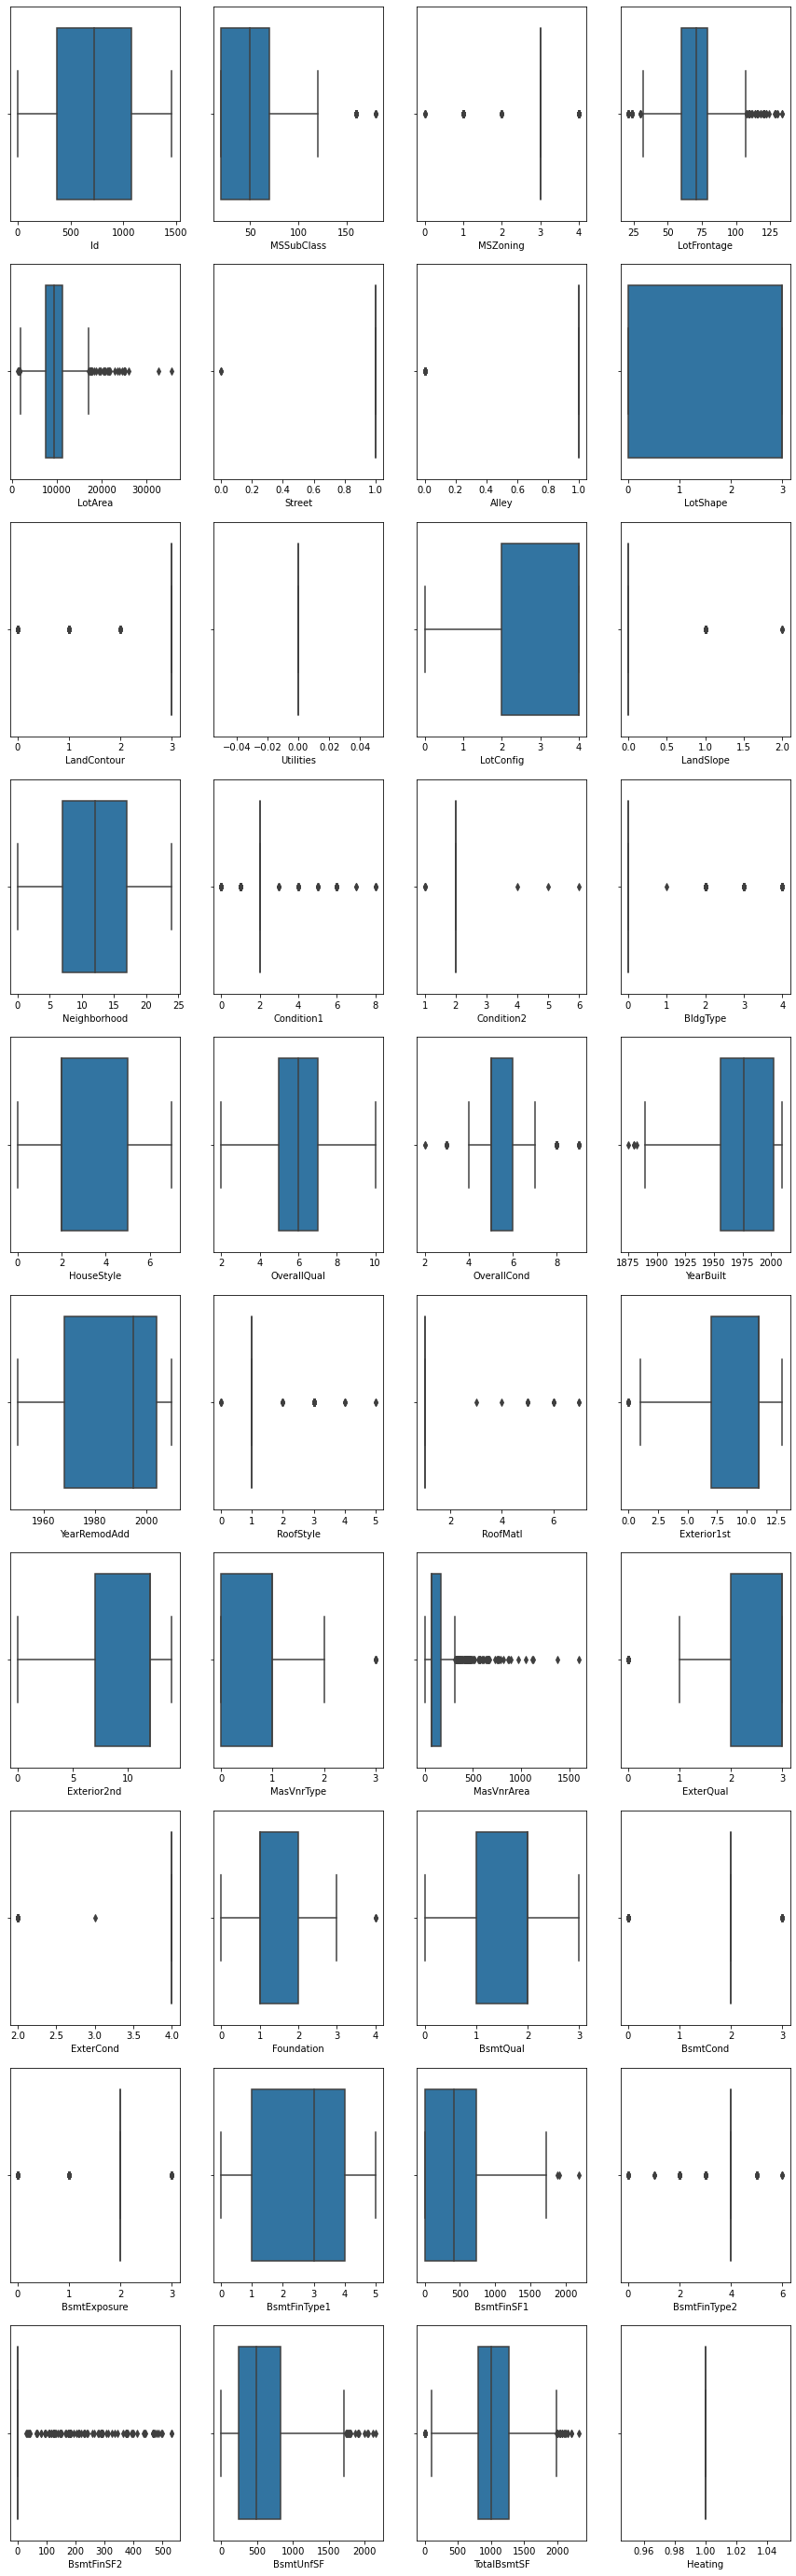

In [118]:
plt.figure(figsize=(15,50))
graph=1
for column in datanew:
    if graph<=40:
        ax=plt.subplot(10,4,graph)
        sns.boxplot(datanew[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [121]:
x=datanew.drop(columns='SalePrice',axis=1)
y=datanew[['SalePrice']]

In [122]:
scalar=StandardScaler()
X=scalar.fit_transform(x)
X

array([[-1.44594291e+00,  1.72334722e+00,  1.53846882e-03, ...,
        -6.01352717e-01,  3.31924703e-01,  1.89414355e-01],
       [ 1.59895762e-01,  1.43038585e-01,  1.53846882e-03, ...,
        -6.01352717e-01,  3.31924703e-01,  1.89414355e-01],
       [-1.48693278e+00, -9.10500509e-01,  1.53846882e-03, ...,
         1.64664737e+00, -4.73836319e+00,  1.89414355e-01],
       ...,
       [-4.16373671e-01, -9.10500509e-01,  1.53846882e-03, ...,
         8.97314006e-01,  3.31924703e-01,  1.89414355e-01],
       [-1.27957224e+00,  2.77688632e+00,  1.53846882e-03, ...,
         8.97314006e-01,  3.31924703e-01,  1.89414355e-01],
       [-2.64470013e-01,  1.43038585e-01,  1.53846882e-03, ...,
        -1.35068608e+00,  3.31924703e-01,  1.89414355e-01]])

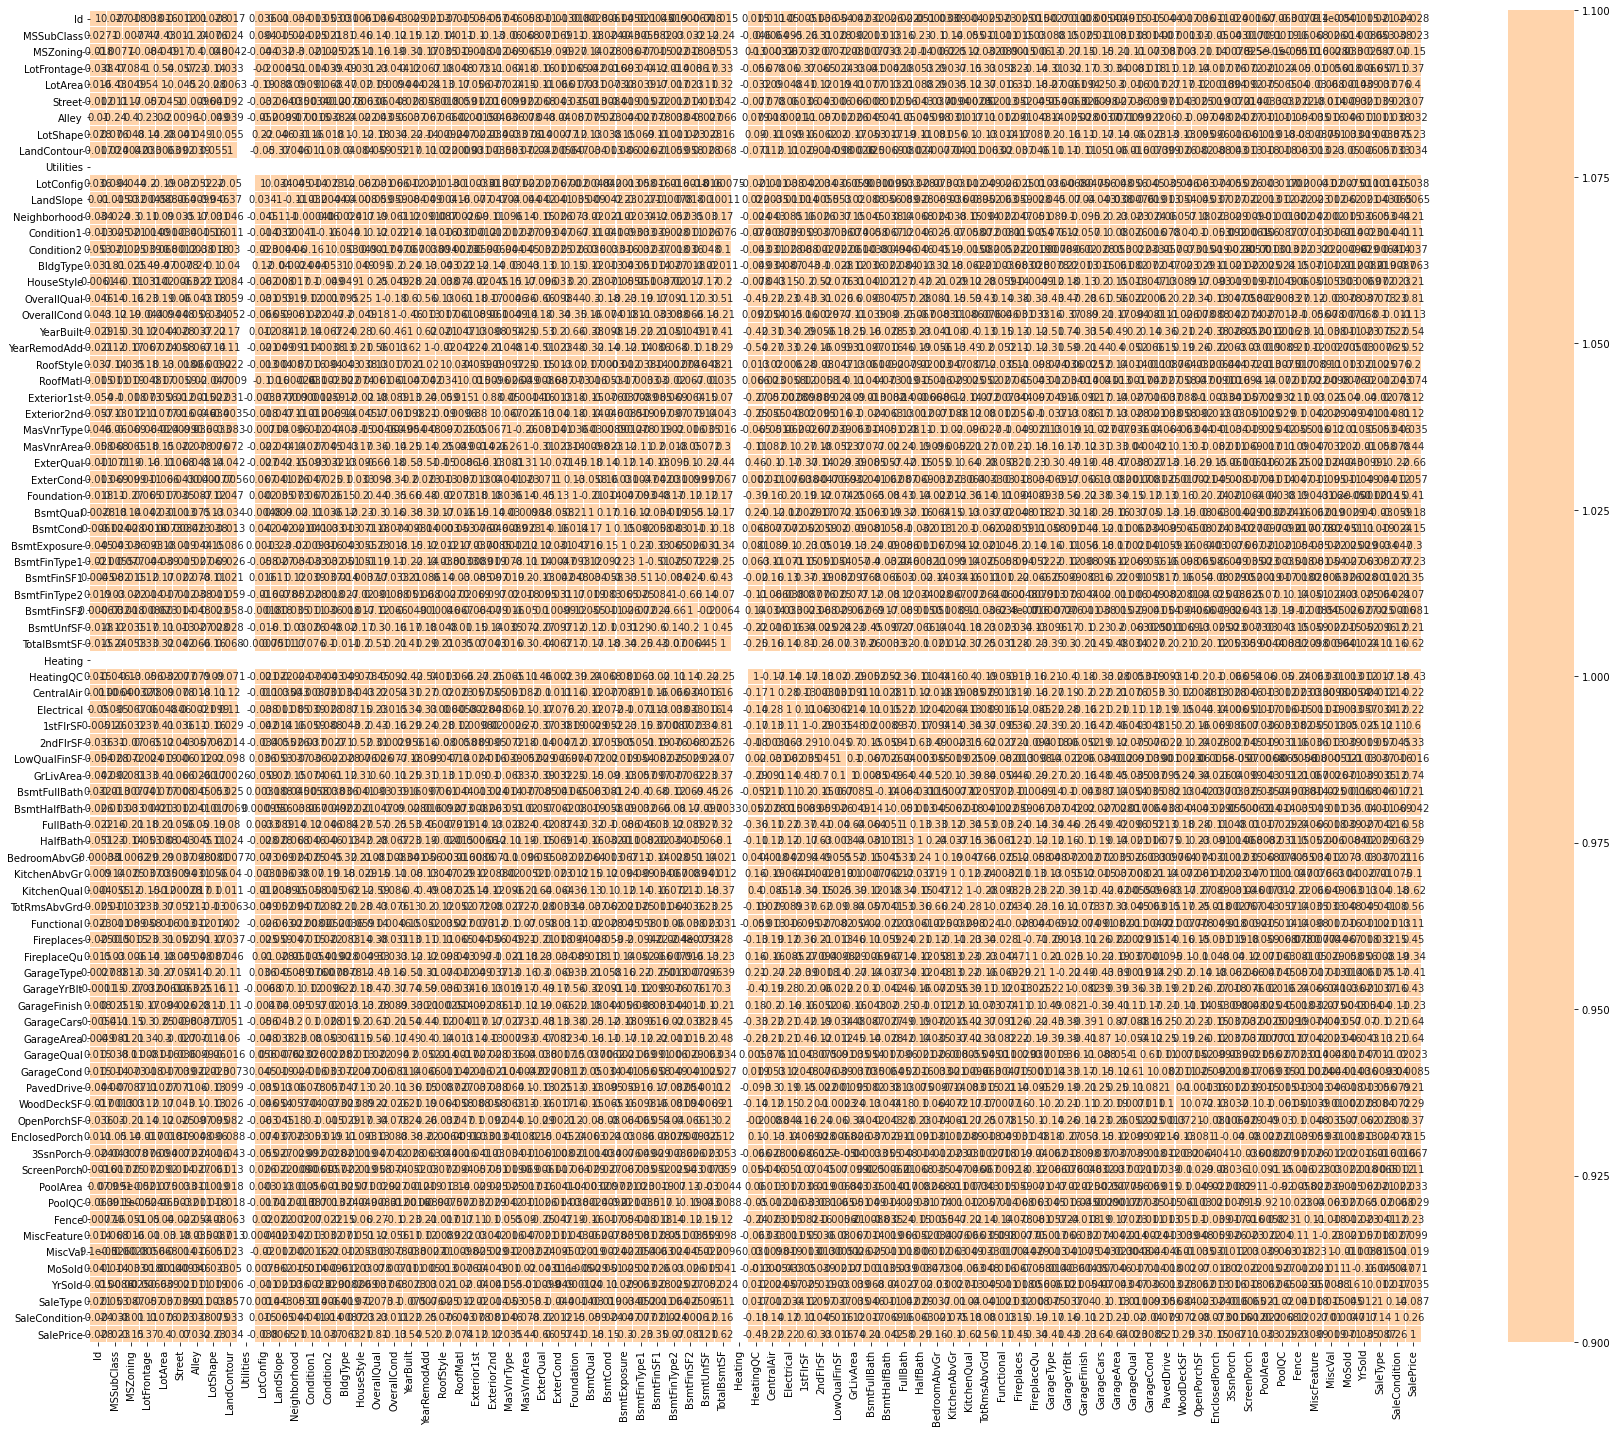

In [132]:
datanew_corr=datanew.corr()
plt.figure(figsize=(25,20))
sns.heatmap(datanew_corr,vmin=1,vmax=1,annot=True,square=True,center=0,fmt='0.2g',linewidths=.1)
plt.tight_layout()

In [133]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.073391,Id
1,10.882225,MSSubClass
2,1.787185,MSZoning
3,2.135072,LotFrontage
4,2.242030,LotArea
...,...,...
75,1.223891,MiscVal
76,1.103703,MoSold
77,1.117792,YrSold
78,1.156910,SaleType


In [135]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=56)

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
lr=LinearRegression()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
kn=KNeighborsClassifier()

In [143]:
## Training with These Classifiers
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
lr.fit(x_train,y_train)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [144]:
## Check The Scores
dt.score(x_test,y_test)

0.0

In [145]:
rf.score(x_test,y_test)

0.00966183574879227

In [146]:
lr.score(x_test,y_test)

0.9036502109797069

In [147]:
kn.score(x_test,y_test)

0.004830917874396135

In [ ]:
## Linear Regression is Best Model with 90% Score